In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np

print(os.listdir("./outputs_percent"))
filename = "./outputs_percent/cnn_eda_2021-11-27_19:24:51.txt"



['cnn_weda_tfidf4_2021-11-28_19:14:16.txt', '.DS_Store', 'cnn_weda_tfidf3_2021-11-28_18:50:27.txt', 'cnn_weda_tfidf1_2021-11-27_20:51:37.txt', 'cnn_eda_2021-11-27_19:24:51.txt', 'cnn_no_aug_2021-11-27_20:04:12.txt', 'cnn_weda_tfidf2_2021-11-27_21:10:22.txt', 'cnn_weda_tfidf0_2021-11-27_20:30:15.txt']


## Percent

In [16]:
eda_file = "./outputs_percent/" + "cnn_eda_2021-11-27_19:24:51.txt"
noaug_file = "./outputs_percent/" + "cnn_no_aug_2021-11-27_20:04:12.txt"
prefix = "cnn_weda_tfidf"

def get_values(filename):
    file = open(filename, "r")
    lines = file.readlines()

    start = -1
    end = -1
    i = 0
    for line in lines: 
        if start == -1 and line[0] == "{":
            start = i

        if end == -1 and line[-2]=="}":
            end = i

        i+=1

    results = []
    value_range = []
 
    for line in lines[end+1:]:
   
        name, value = line.split(":")

        second_name, test = name.split("/")
        value_range.append(float(test))
        results.append(float(value))
    return np.array(results), value_range

def plot_file(filename):
    results_weda, value_range = get_values(filename)
    results_eda, _ = get_values(eda_file)
    results_noaug, _ = get_values(noaug_file)
    
    title = filename.split("/")[2][len(prefix)]
    print(title)
    plt.title("Compare TF-IDF {} with EDA and no augmentation".format(title))
    
    plt.plot(value_range, np.zeros(len(value_range)), color="black", alpha=0.5)
    plt.plot(value_range, results_weda-results_eda, label="diff EDA")
    plt.plot(value_range, results_weda-results_noaug, label="diff no aug")
    plt.xlabel("Percent dataset")
    plt.ylabel("Diff in accuracy")
    plt.legend()
    plt.show()
    

In [41]:
def plot_folder(folder_name):

    filenames = os.listdir(folder_name)
    for filename in filenames:
        if not folder_name+"/"+filename in [eda_file, noaug_file]:
            if filename != ".DS_Store":
                plt.figure(figsize=(5,4))
                plot_file(folder_name+"/"+filename)
        


NameError: name 'eda_file' is not defined

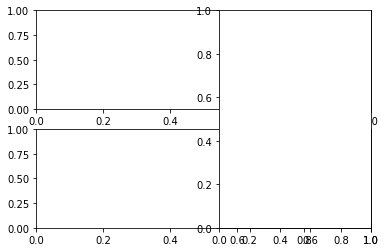

In [42]:
plot_folder("./outputs_percent")

## Alphas Total

['.DS_Store', 'cnn_weda_alpha_total_2021-12-03_22:57:06.txt', 'cnn_no_aug_2021-12-04_01:46:39.txt', 'cnn_no_aug_2021-12-04_14:06:57.txt', 'rnn_eda_alpha_total_2021-12-03_22:57:06.txt']


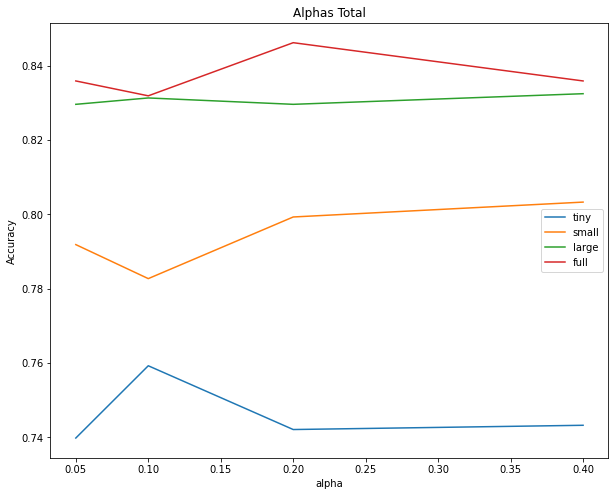

In [28]:
no_aug_filename = "cnn_no_aug_2021-11-29_01/13/23.txt"
file = "cnn_weda_alpha_total_2021-12-03_22:57:06.txt"
folder_name = "./outputs_alpha_total_f1/"

print(os.listdir(folder_name))
def get_info_from_file_total(start, size, filename, label):
    end = start+size
    file = open(filename, "r")
    lines = file.readlines()
    value_range = []
    results = []
    
    for line in lines[start:end]:
        name, value = line.split(":")

        value_range.append(float(name))
        results.append(float(value))


    plt.plot(value_range, results, label=label)
    
def plot_alphas_total():
    methods = ["RD", "RS", "RI", "SR"]
    methods_files = [rd_file, rs_file, ri_file, sr_file]
    
    plt.figure( figsize=(10,8)) # TODO: add in same figure
    plt.title("Alphas Total")
    get_info_from_file_total( 2, 4, folder_name+file, "tiny") # TODO: add num samples
    get_info_from_file_total( 8, 4, folder_name+file, "small") 
    get_info_from_file_total( 14, 4, folder_name+file, "large") 
    get_info_from_file_total(20, 4, folder_name+file, "full") 
    plt.legend()
    plt.xlabel("alpha")
    plt.ylabel("Accuracy")

plot_alphas_total()



## Alphas Decomposed

['cnn_eda_ri_2021-11-28_21:58:35.txt', '.DS_Store', 'cnn_weda_rd_2021-11-28_23:02:35.txt', 'cnn_eda_sr_2021-11-28_20:39:03.txt', 'cnn_weda_rs_2021-11-29_00:09:07.txt', 'cnn_no_aug_2021-11-29_01:13:23.txt', 'cnn_weda_sr_2021-11-28_20:39:03.txt', 'cnn_eda_rs_2021-11-29_00:09:07.txt', 'cnn_weda_ri_2021-11-28_21:58:35.txt', 'cnn_eda_sr_2021-11-28_20:37:56.txt', 'cnn_eda_rd_2021-11-28_23:02:35.txt']


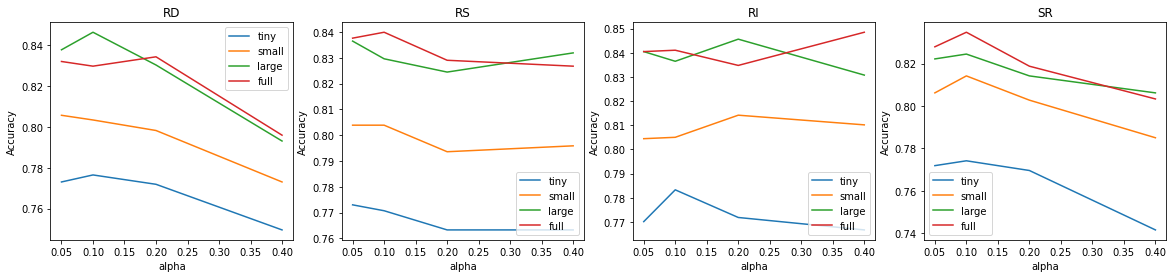

In [23]:
no_aug_filename = "cnn_no_aug_2021-11-29_01/13/23.txt"
rd_file = "cnn_weda_rd_2021-11-28_23:02:35.txt"
rs_file = "cnn_weda_rs_2021-11-29_00:09:07.txt"
ri_file = "cnn_weda_ri_2021-11-28_21:58:35.txt"
sr_file = "cnn_weda_sr_2021-11-28_20:39:03.txt"
folder_name = "./outputs_alpha_decomposed/"

print(os.listdir(folder_name))
def get_info_from_file(ax, i, start, size, filename, label):
    end = start+size
    file = open(filename, "r")
    lines = file.readlines()
    value_range = []
    results = []
    
    for line in lines[start:end]:
        name, value = line.split(":")

        value_range.append(float(name))
        results.append(float(value))


    ax[i].plot(value_range, results, label=label)
    
def plot_alphas_decomposed():
    methods = ["RD", "RS", "RI", "SR"]
    methods_files = [rd_file, rs_file, ri_file, sr_file]
    
    fig, ax = plt.subplots(1,4, figsize=(20,4)) # TODO: add in same figure
    for i, val  in enumerate(zip(methods, methods_files)):
        method, file = val
        ax[i].set_title(method)
        get_info_from_file(ax,i, 2, 4, folder_name+file, "tiny") # TODO: add num samples
        get_info_from_file(ax, i, 8, 4, folder_name+file, "small") 
        get_info_from_file(ax, i, 14, 4, folder_name+file, "large") 
        get_info_from_file(ax, i, 20, 4, folder_name+file, "full") 
        ax[i].legend()
        ax[i].set_xlabel("alpha")
        ax[i].set_ylabel("Accuracy")

plot_alphas_decomposed()
